# Demo of TOAD's plotting functions

TOAD offers a few simple plotting functions to help you explore the results.


In [1]:
# Prerequisites
import numpy as np
import matplotlib.pyplot as plt
from toad import TOAD
import fast_hdbscan

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 5)

/Users/jakobharteg/miniconda3/envs/phd-toad/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/jakobharteg/miniconda3/envs/phd-toad/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


First, we run TOAD:


In [ ]:
td = TOAD("test_data/garbe_2020_antarctica.nc")
td.data = td.data.coarsen(x=2, y=2, time=3, boundary="trim").reduce(np.mean)
# td.compute_shifts(...) already done
td.compute_clusters(
    var="thk",
    method=fast_hdbscan.HDBSCAN(min_samples=25),
    shifts_filter_func=lambda x: np.abs(x) > 0.8,
    var_filter_func=lambda x: x > 1,
    overwrite=True,
)

/Users/jakobharteg/miniconda3/envs/phd-toad/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## `PlotConfig`

When calling `plotter()` you can pass a `PlotConfig` object with various settings to control the appearance of the plot.


In [3]:
from toad.visualisation.toad_plotter import PlotConfig

td_plotter = td.plotter(
    PlotConfig(
        grid_labels=False,
        projection="south_pole",
        map_frame=True,
        # borders=True,
        # coastline_linewidth=0.5,
        # resolution="110m",
        # border_linewidth=0.25,
        # grid_style="--",
        # grid_width=0.5,
        # grid_color="gray",
        # grid_alpha=0.5,
        # projection="plate_carree",
    )
)

## `cluster_map()`

First off, let's plot the 10 largest cluster in the antarctica data set


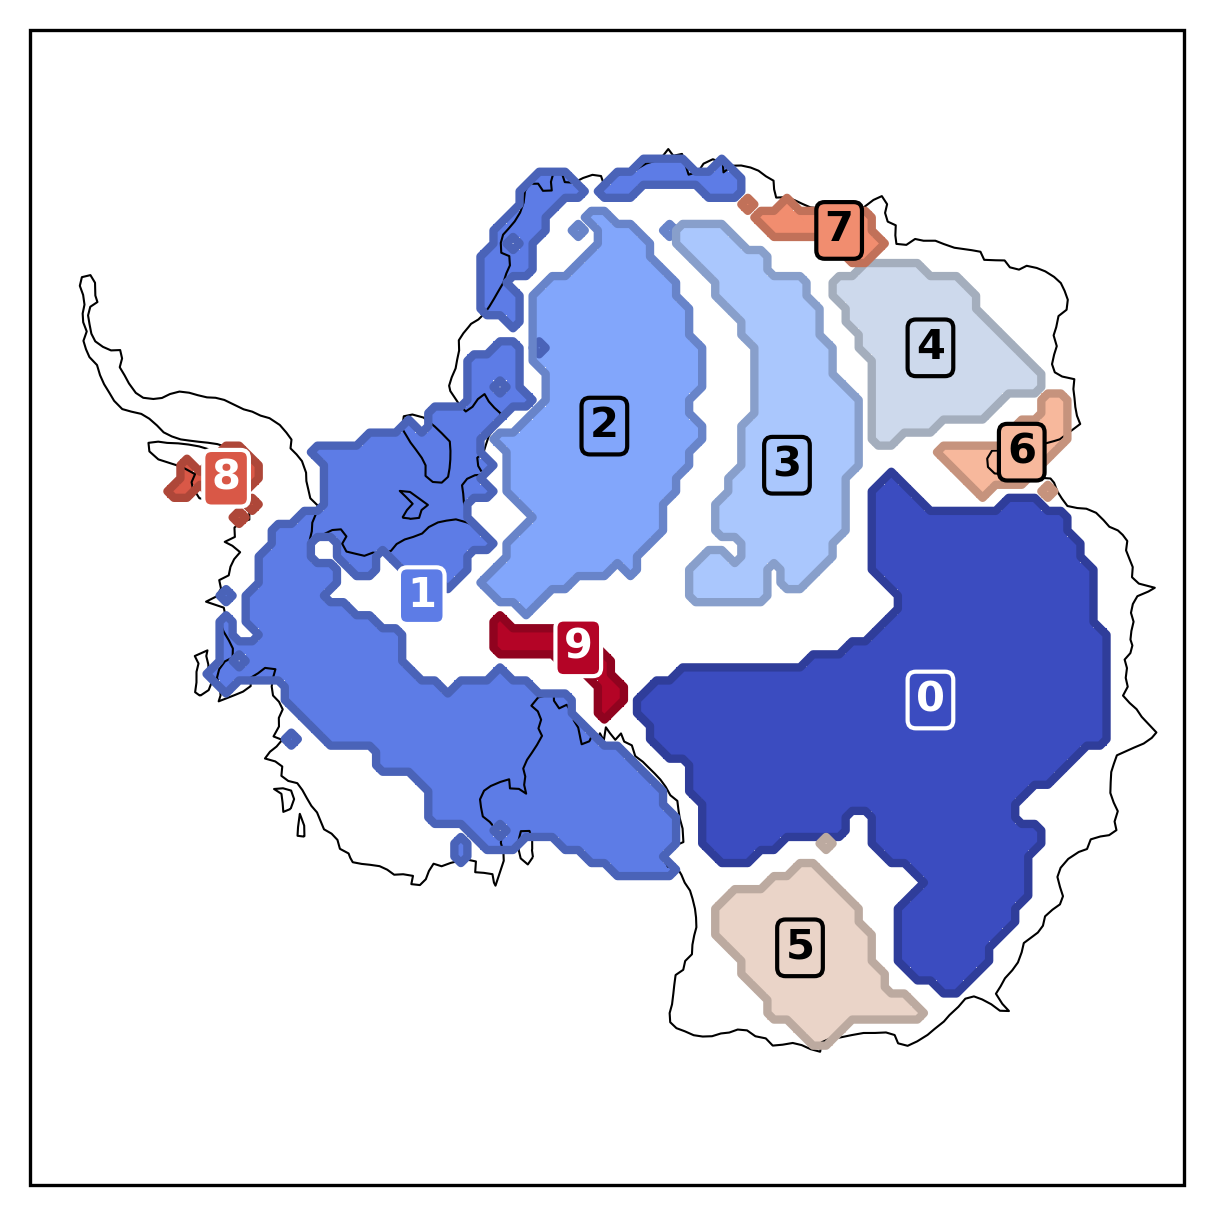

In [4]:
td_plotter.cluster_map(
    "thk",
    cluster_ids=range(10),
    add_contour=True,
    cmap="coolwarm",
);

## `cluster_maps()`

`cluster_map()` makes one map with clusters, while `cluster_maps()` puts each cluster on its own map:


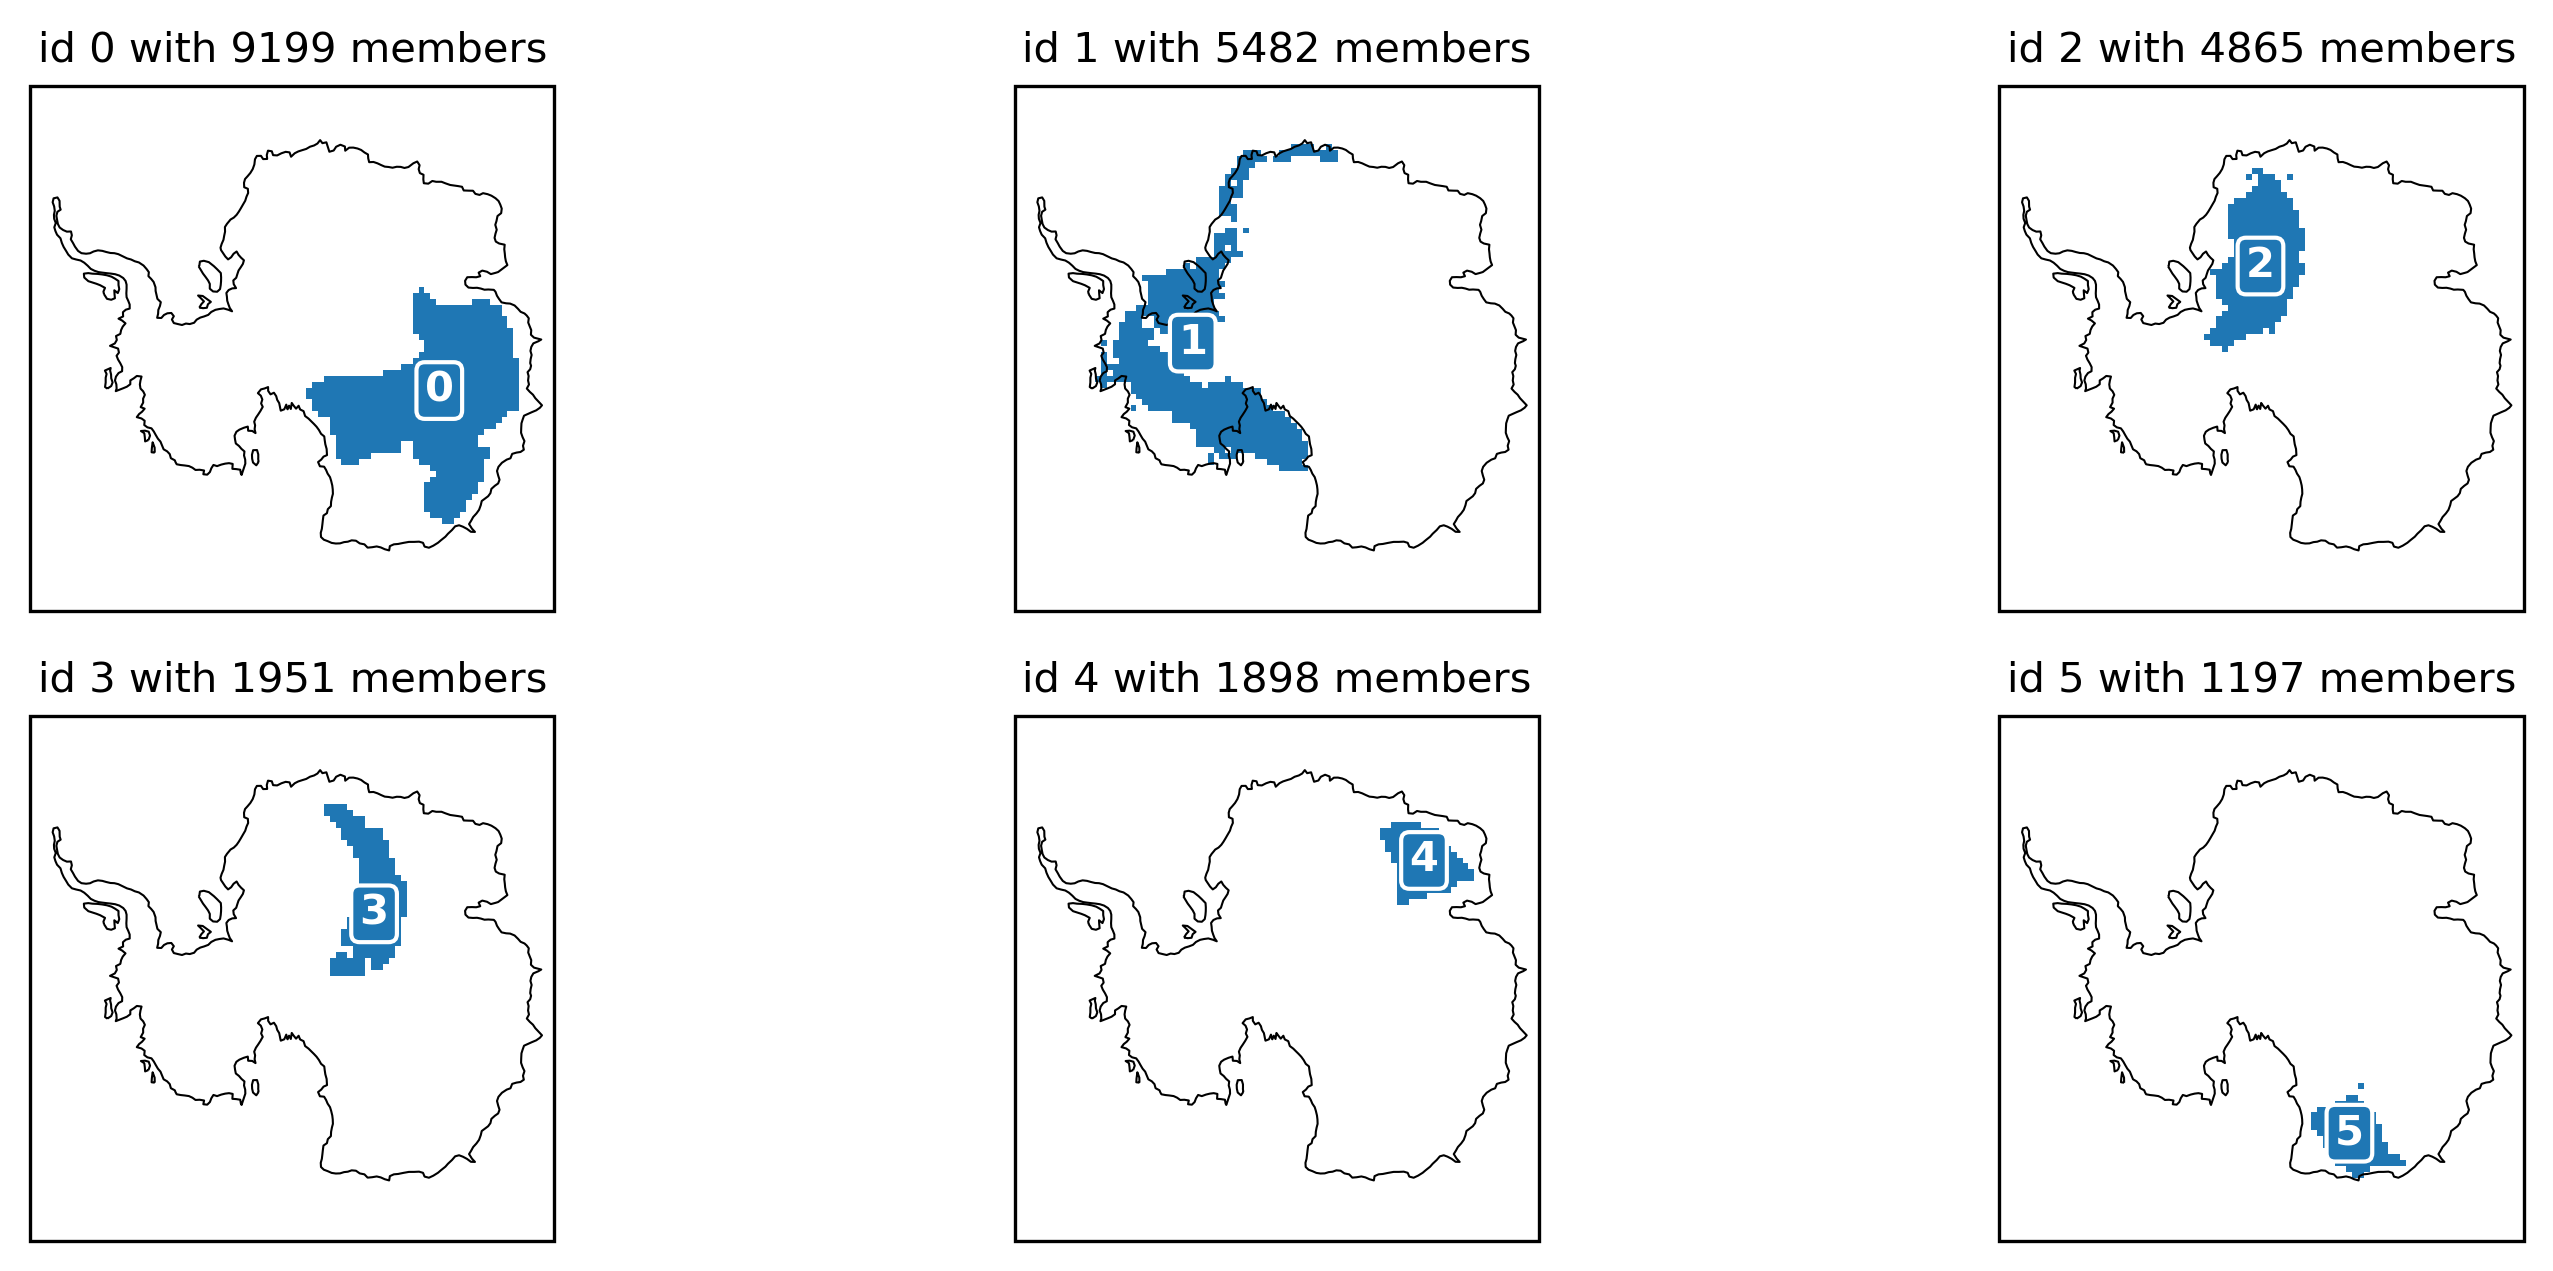

In [5]:
td_plotter.cluster_maps("thk", cluster_ids=range(6), ncols=3)

## `cluster_evolution()`

Plot the temporal evolution of a cluster:


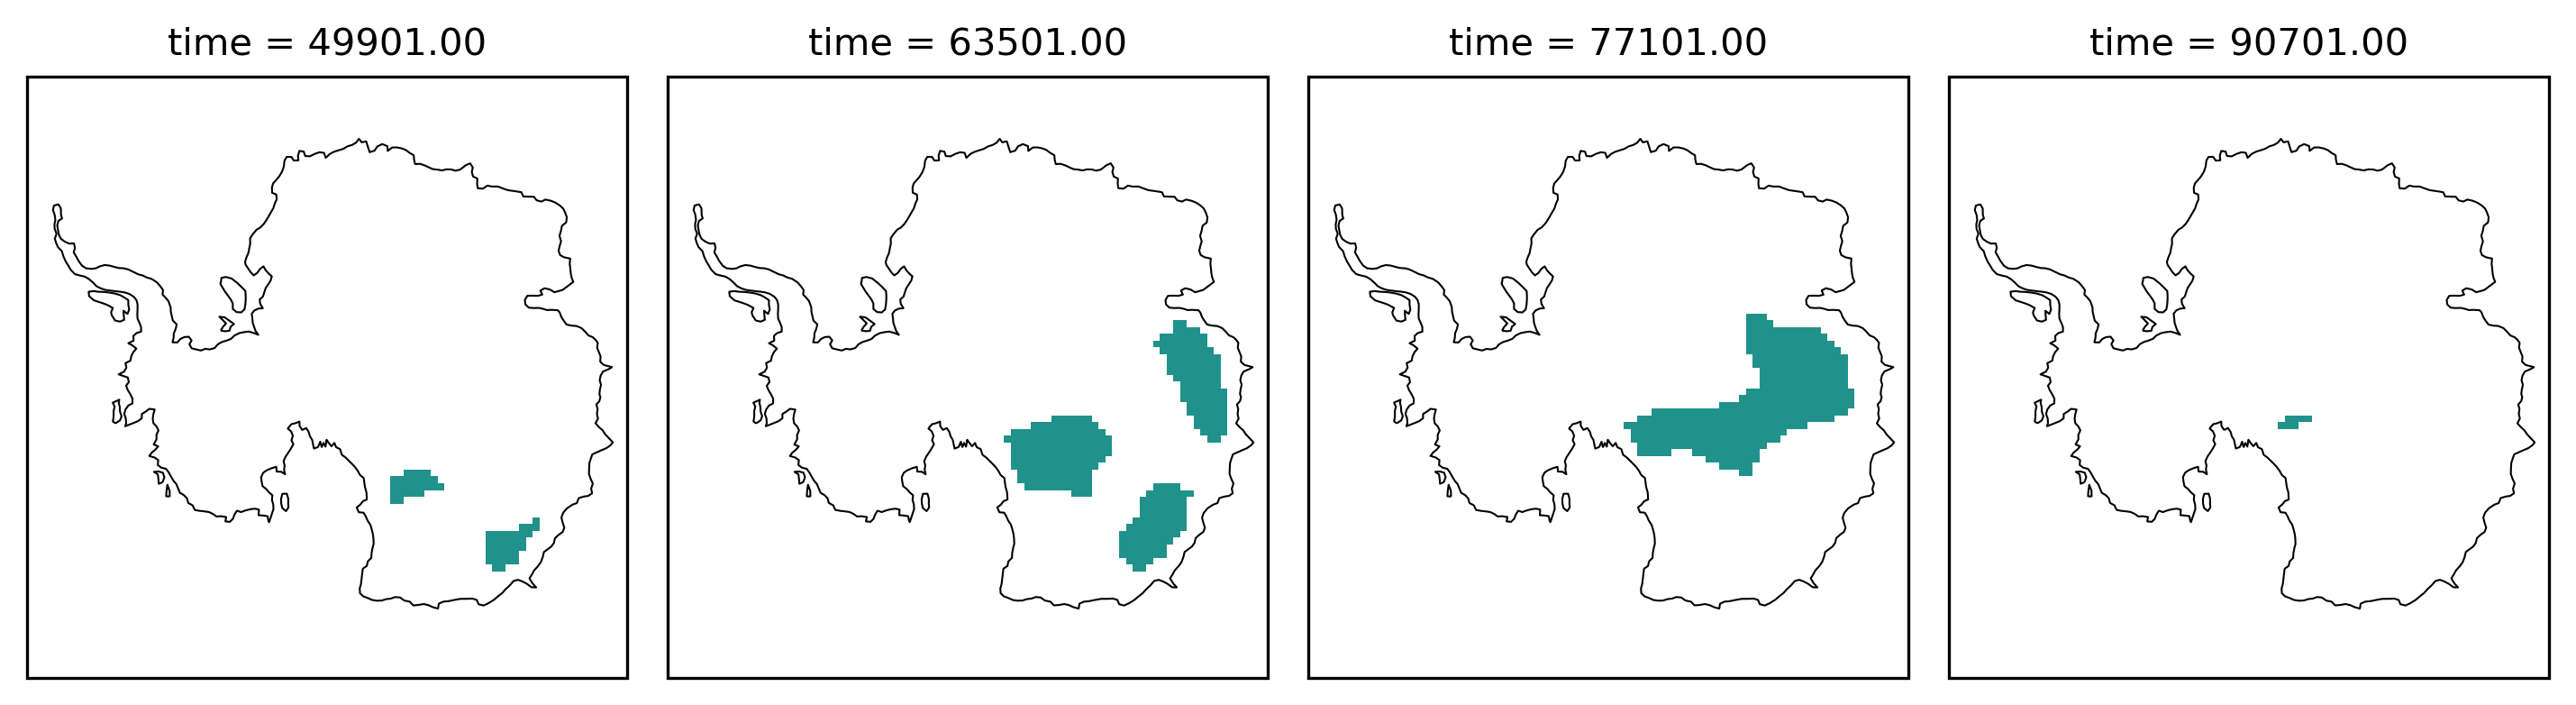

In [6]:
fig, axs = td_plotter.cluster_evolution(
    "thk",
    plot_var="thk_cluster",  # specify a different variable to plot
    cluster_id=0,
    snapshots=4,
)

## `cluster_timeseries()`

Plot the timeseries of the grid cells that make up a cluster


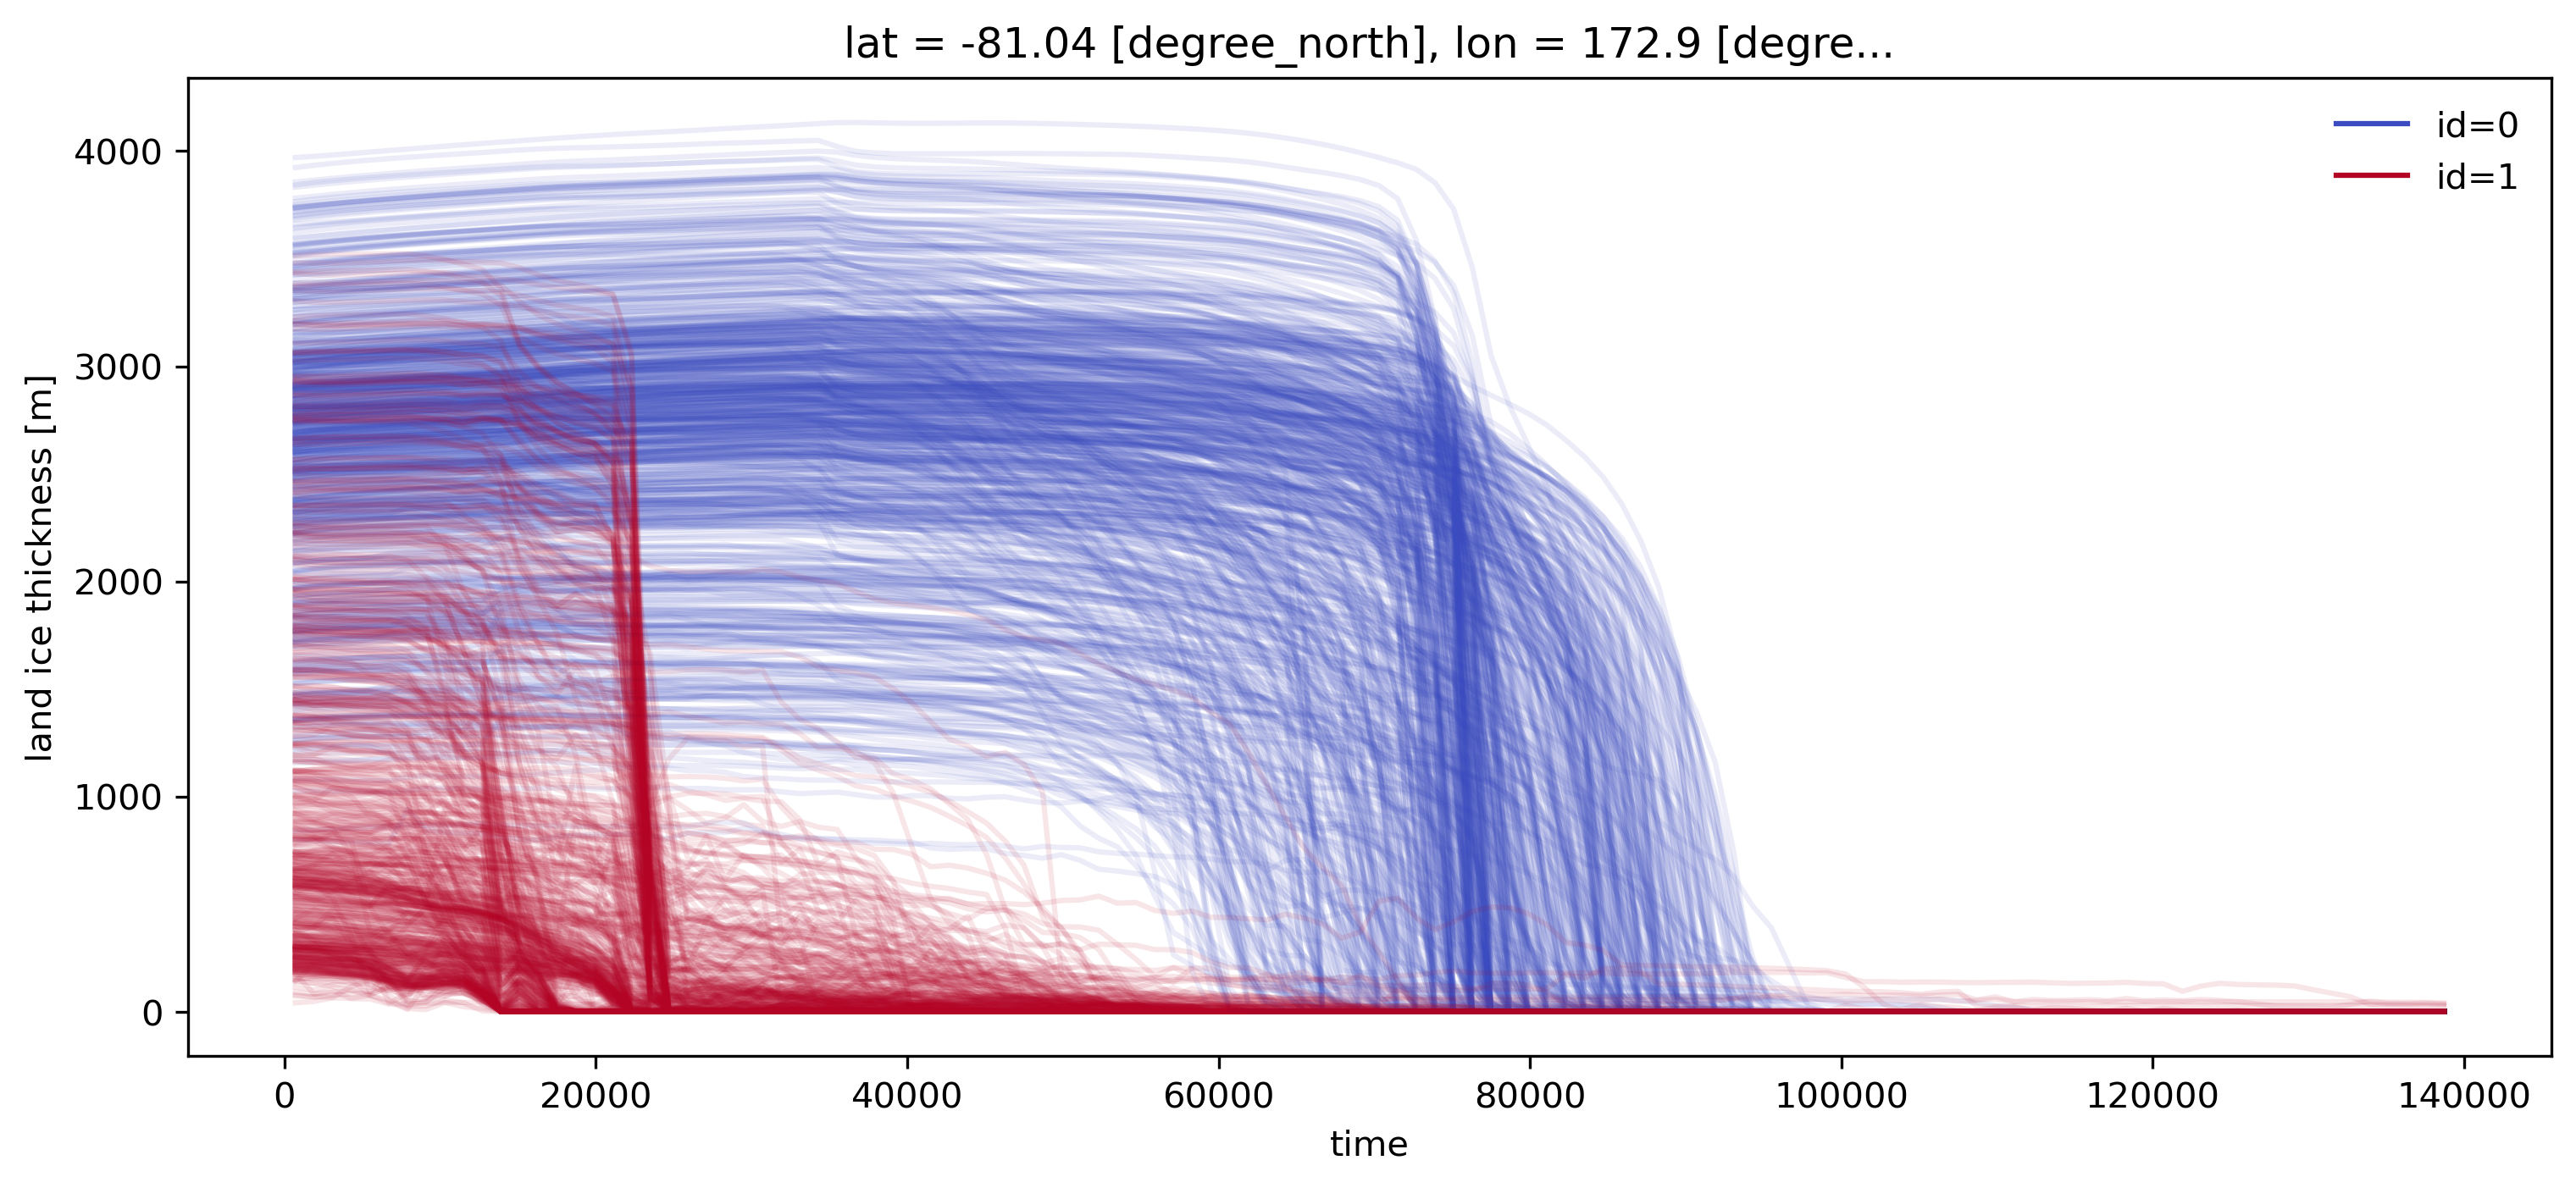

In [7]:
td_plotter.cluster_timeseries("thk", cluster_ids=[0, 1]);

## `cluster_aggregate()`

Aggregate of the timeseries.


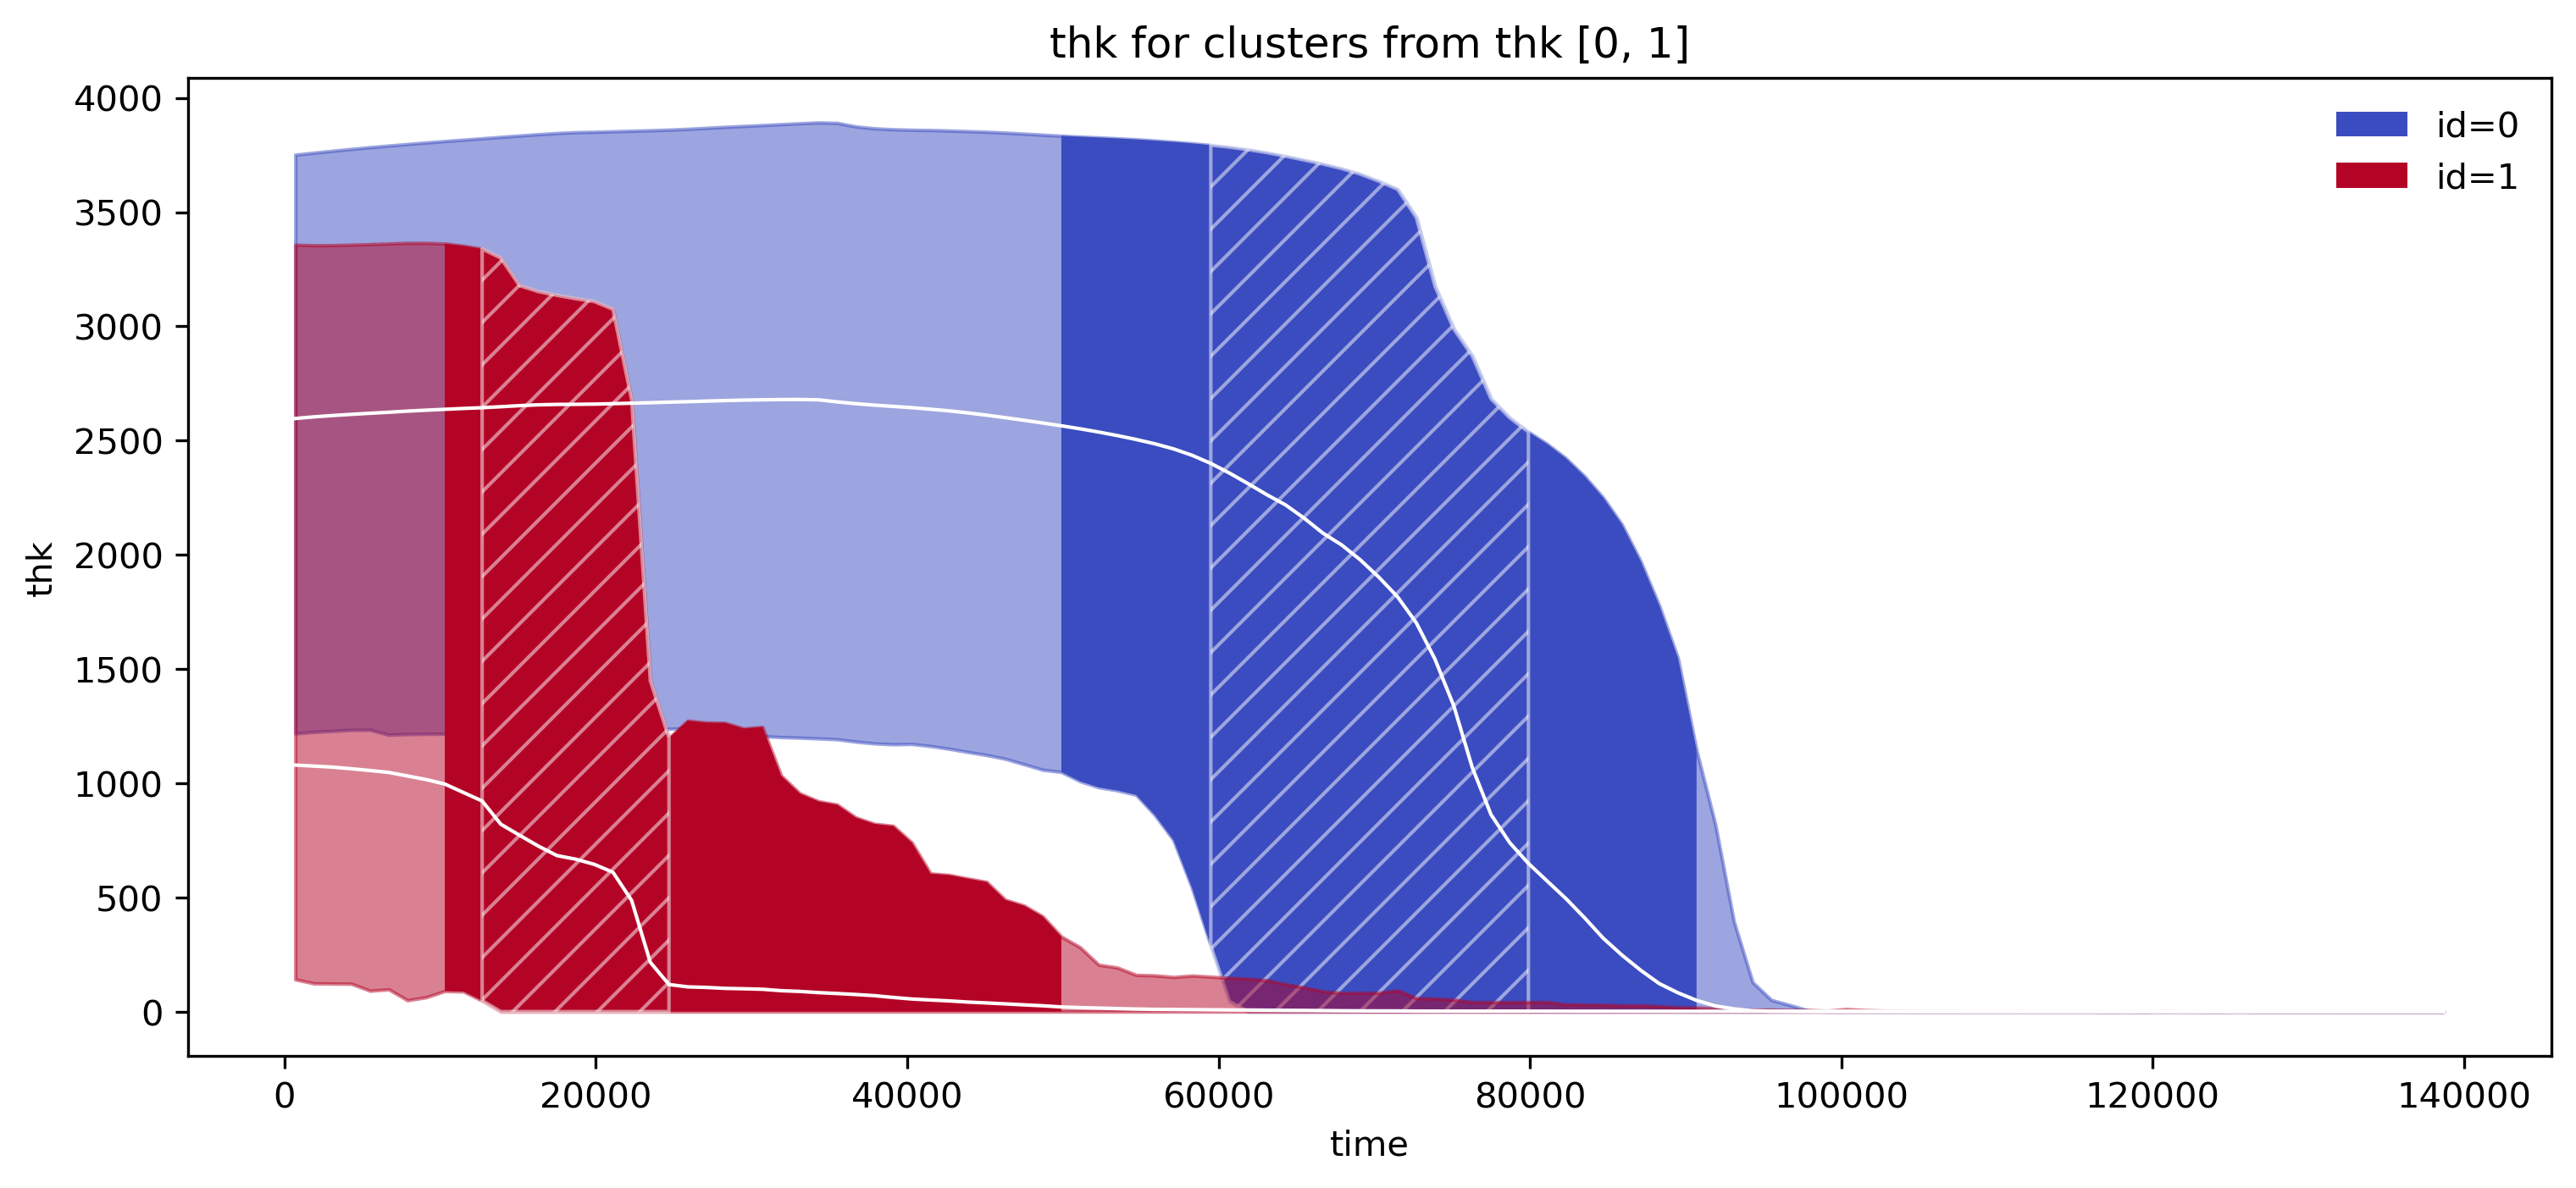

In [26]:
td_plotter.cluster_aggregate(
    "thk",
    plot_var="thk",
    cluster_ids=[0, 1],
);

You can also plot other variables, below we compare the original data `thk` to the computed shifts timeseries `thk_dts`.


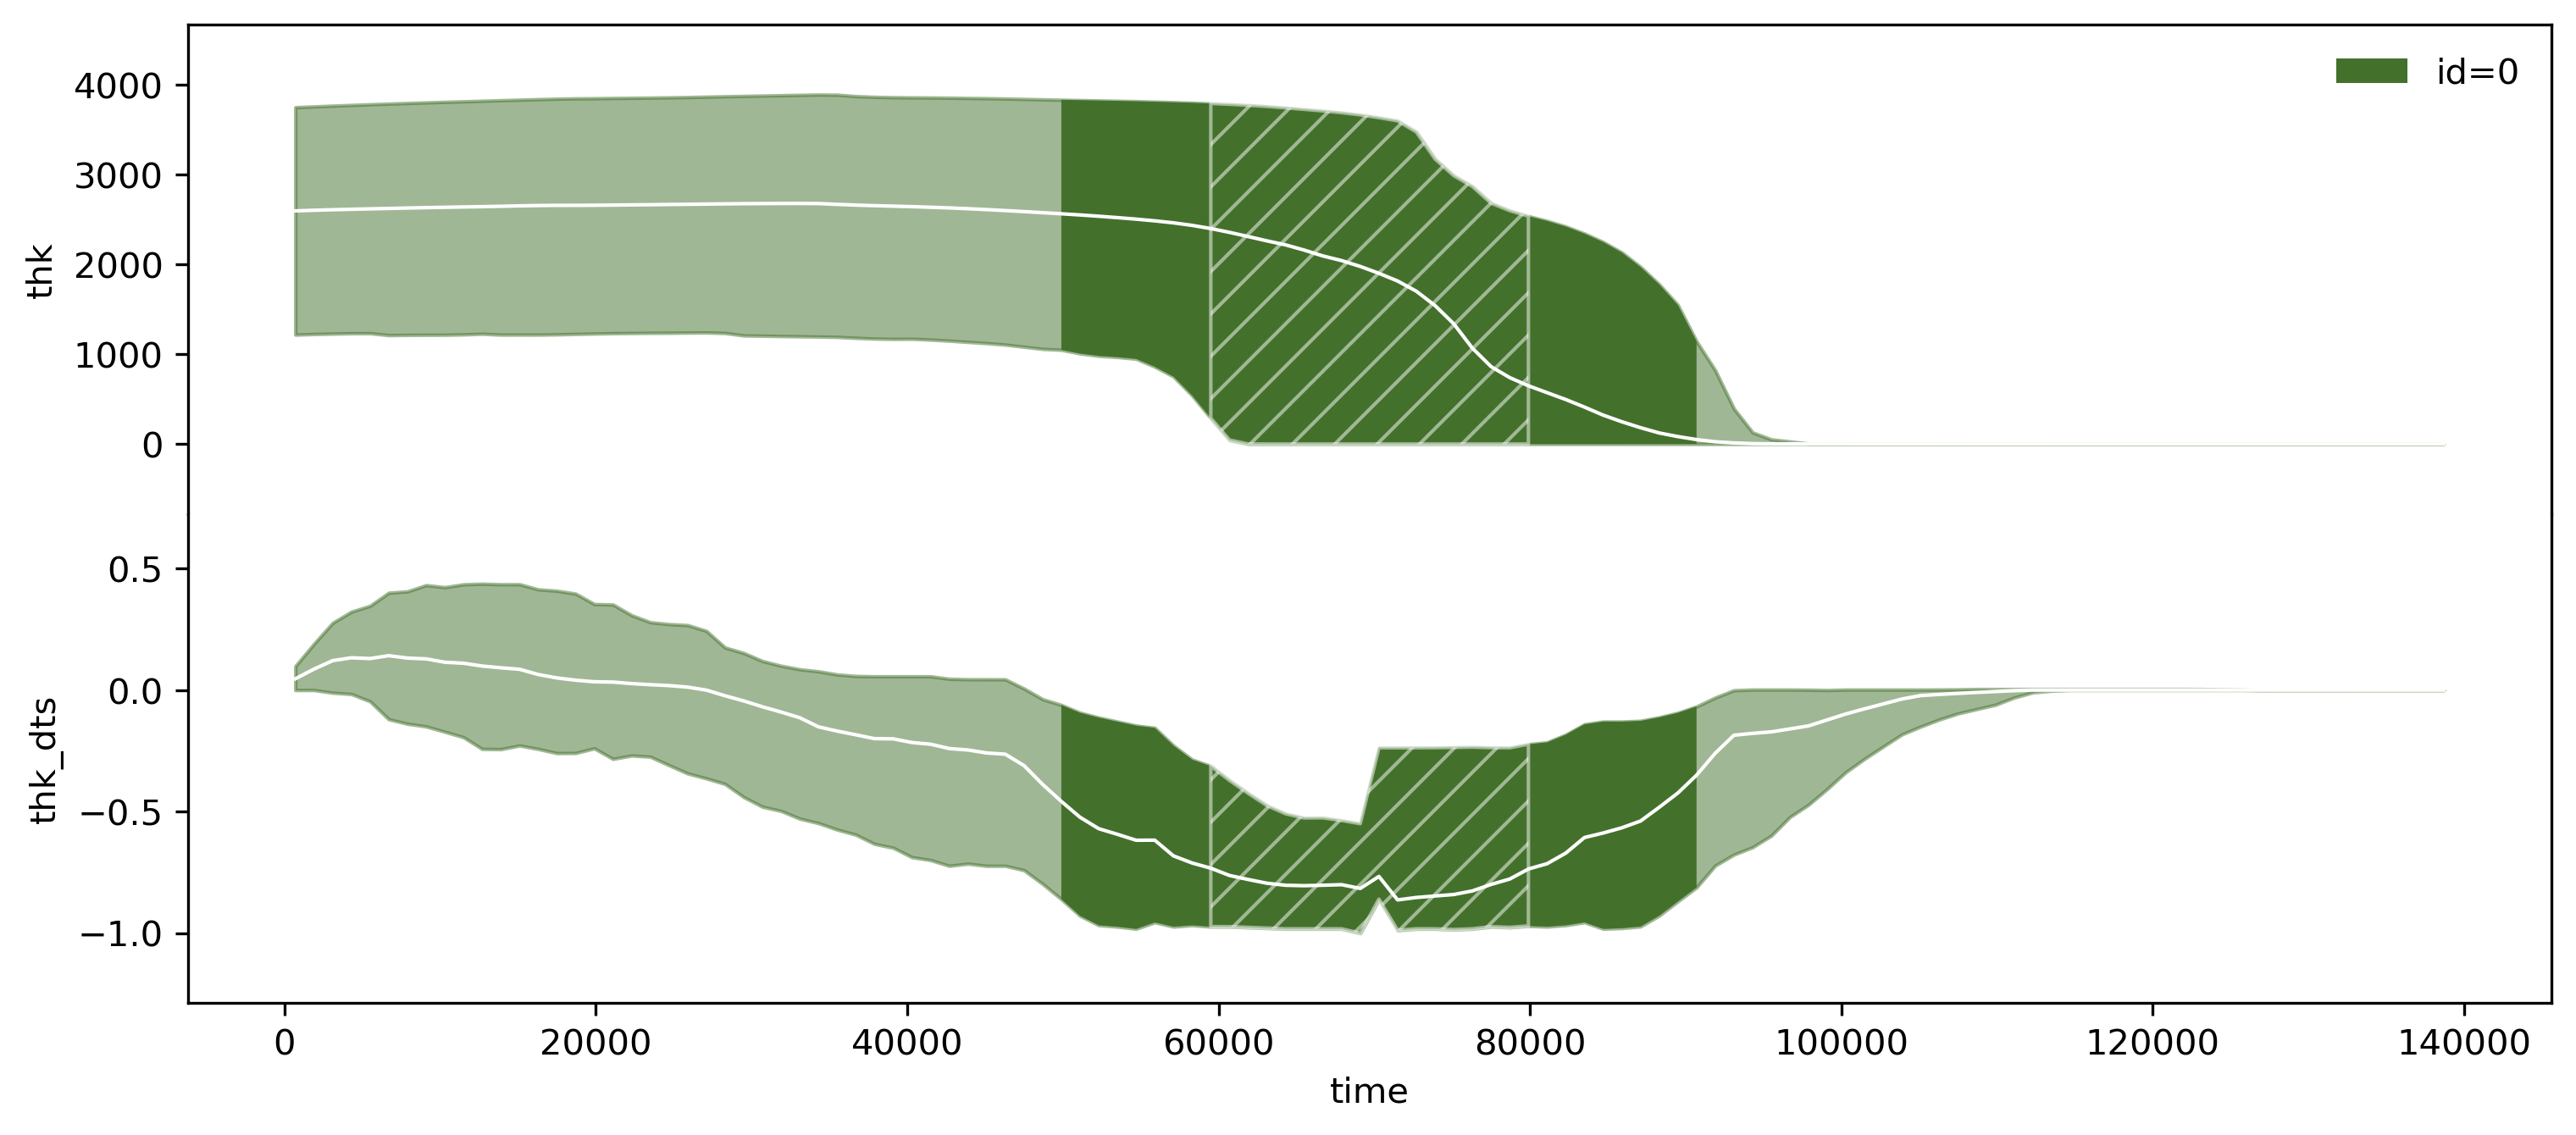

In [27]:
fig, axs = td_plotter.frame_plot_with_rows(2, alternate_label_side=False)

td_plotter.cluster_aggregate(
    "thk",
    cluster_ids=[0],
    ax=axs[0],
)

td_plotter.cluster_aggregate(
    "thk",
    plot_var="thk_dts",
    cluster_ids=[0],
    ax=axs[1],
    add_legend=False,
)

axs[0].set_title("")
axs[0].set_xlabel("")
axs[1].set_title("");

## `cluster_overview()`

`cluster_map()` with `cluster_aggregate()`.


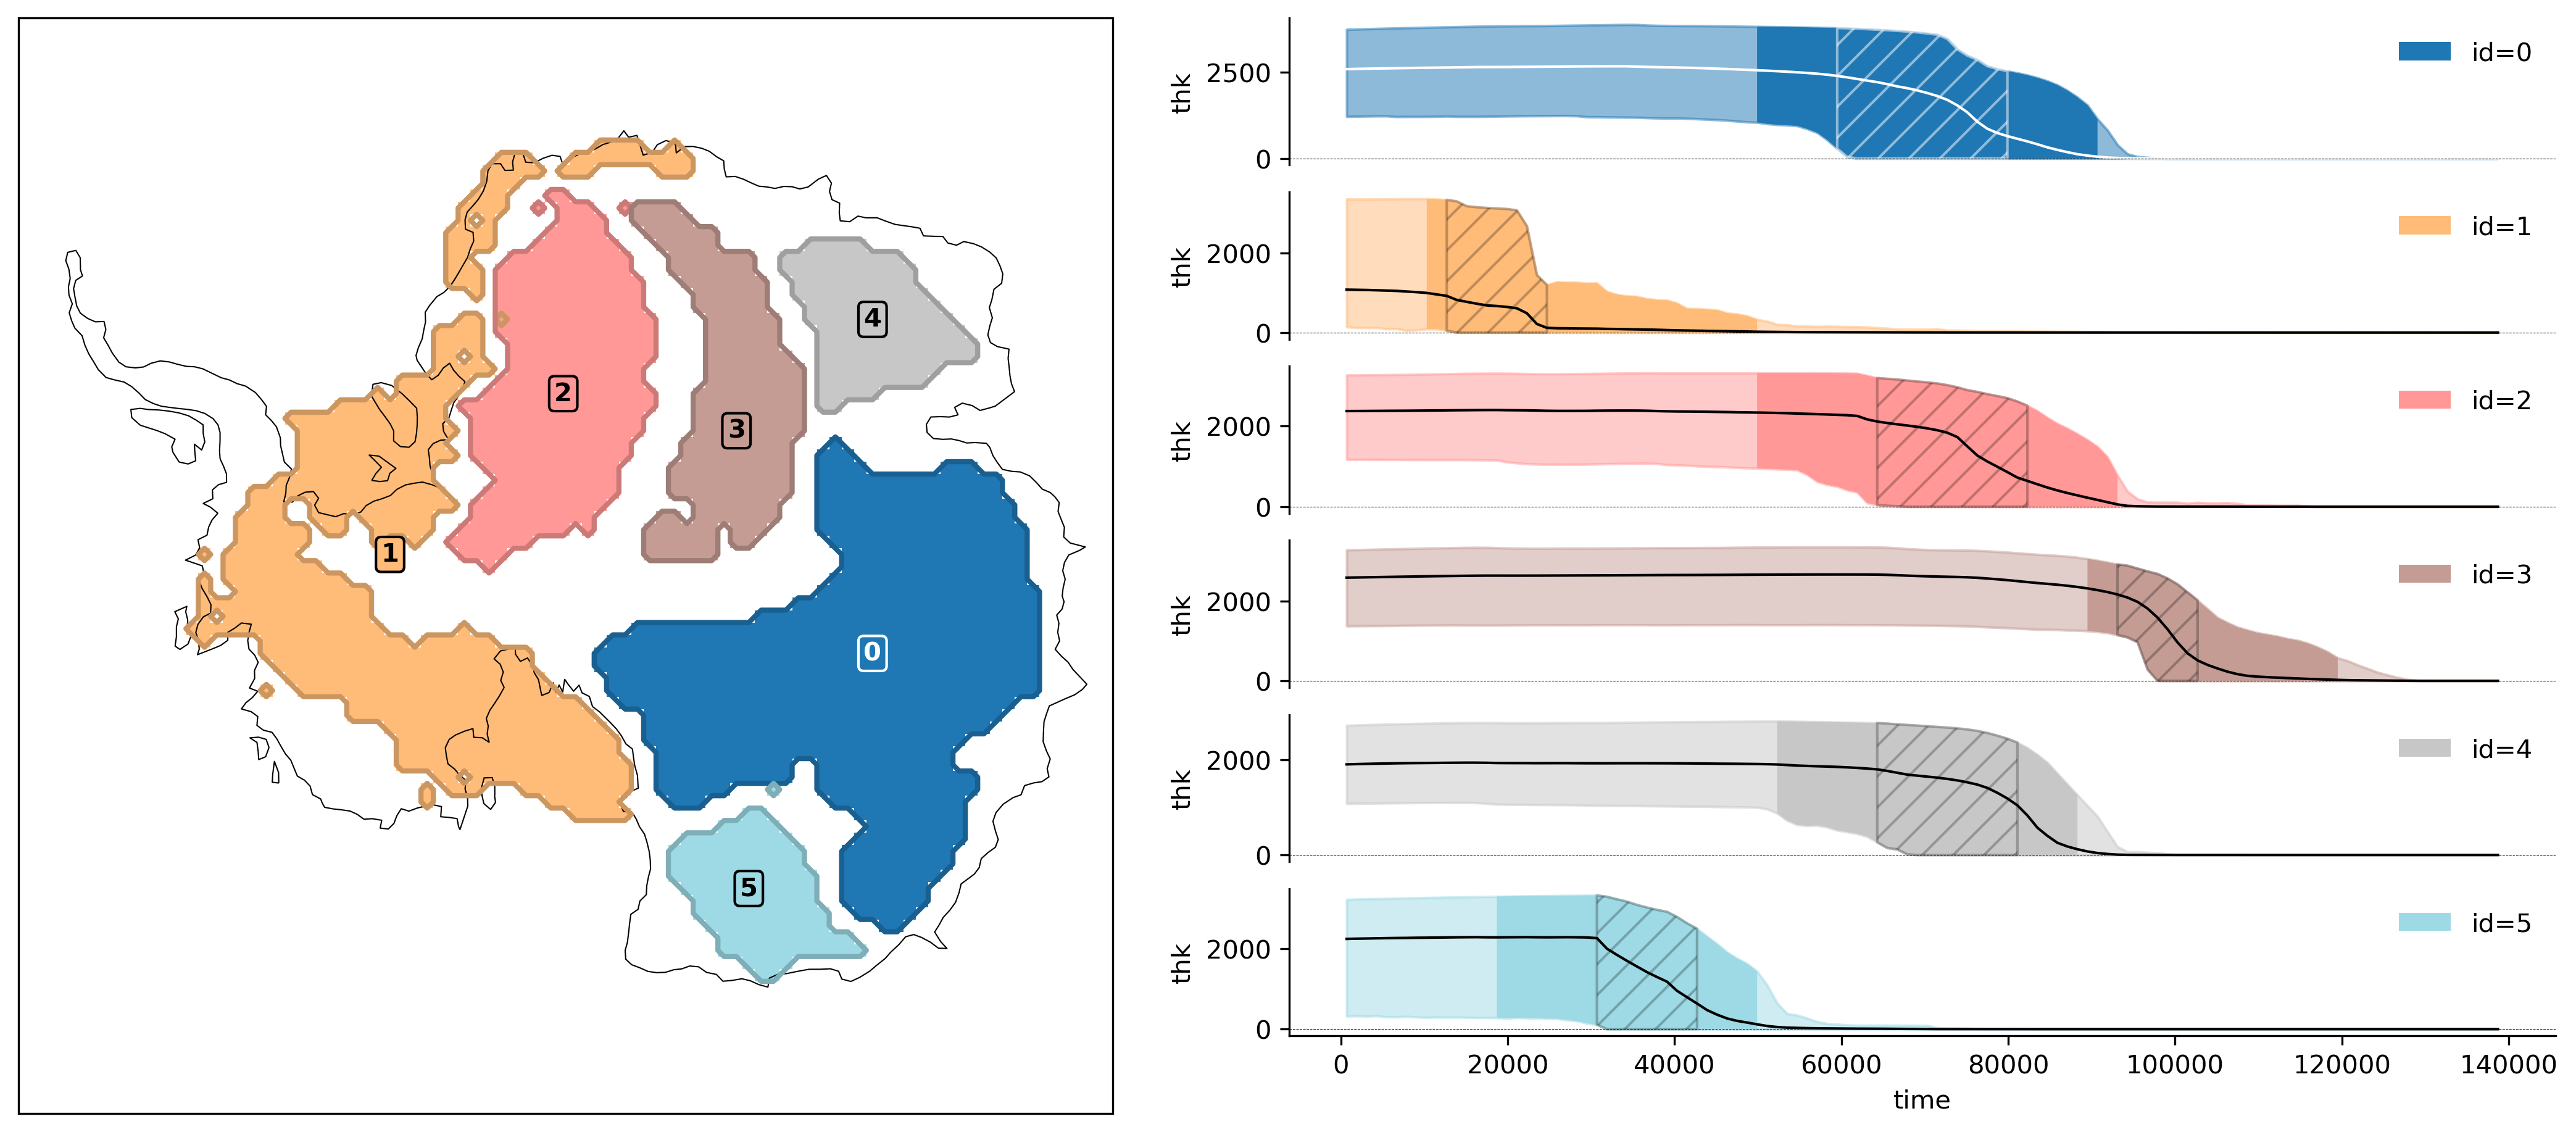

In [ ]:
td_plotter.cluster_overview(
    "thk",
    range(6),  # plot the first/largest 6 clusters
    timeseries_ylabel=True,
    figsize=(14, 6),
    map_kwargs={"add_contour": True},  # all params you would add to cluster_map()
    timeseries_kwargs={},  # all params you would add to cluster_aggregate()
);

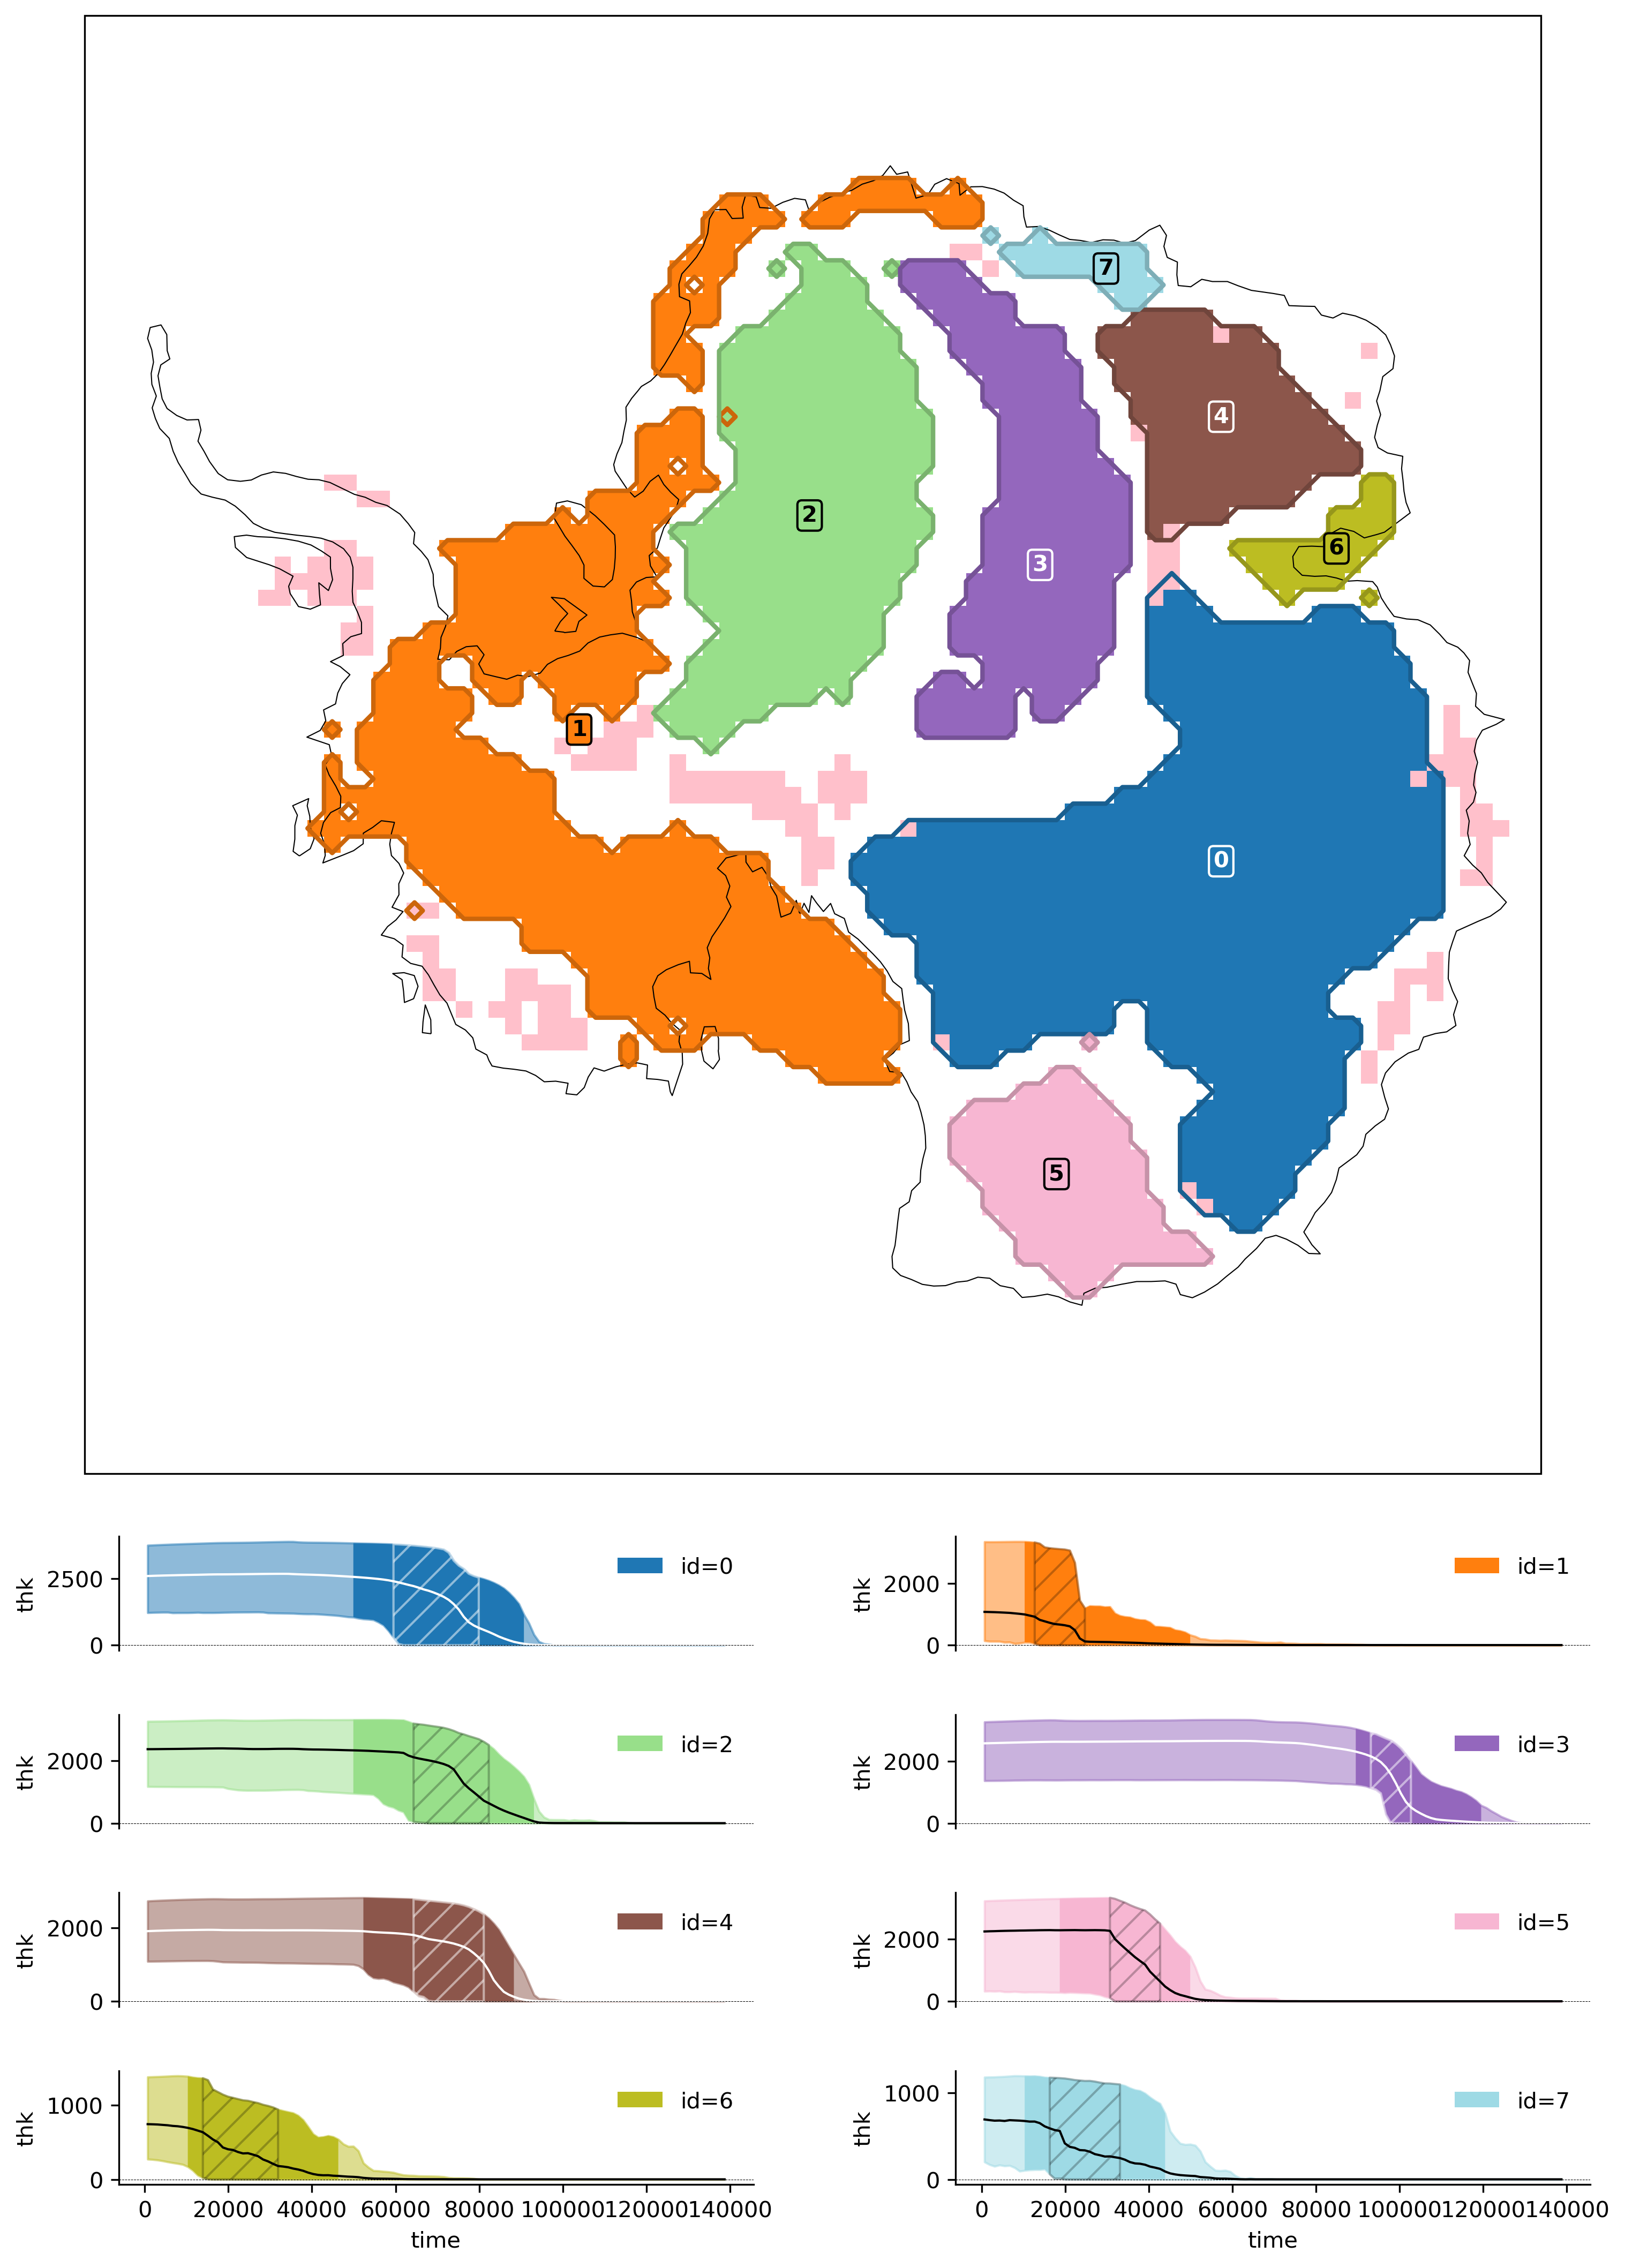

In [30]:
# Or in vertical mode
td_plotter.cluster_overview(
    "thk",
    range(6),
    timeseries_ylabel=True,
    map_kwargs={"add_contour": True, "remaining_clusters_color": "pink"},
    vertical=True,
    figsize=(10, 14),
    n_timeseries_col=2,
    height_ratios=[2, 1],
);